In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [ ]:
pip freeze > requirements.txt


In [ ]:
img_size = 128
batch_size = 32

In [ ]:
train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "/content/test/"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

valid_datagen = (rescale=1.0 / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


In [ ]:
model = Sequential(
    [
        Input(shape=(img_size, img_size, 3)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation="softmax"),
    ]
)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 412s 187ms/step - accuracy: 0.5283 - loss: 1.5477 - val_accuracy: 0.7693 - val_loss: 0.7528
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 453s 192ms/step - accuracy: 0.6926 - loss: 0.9868 - val_accuracy: 0.8667 - val_loss: 0.4212
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 436s 189ms/step - accuracy: 0.7571 - loss: 0.7739 - val_accuracy: 0.8803 - val_loss: 0.3725
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 424s 181ms/step - accuracy: 0.7845 - loss: 0.6800 - val_accuracy: 0.8893 - val_loss: 0.3419
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 430s 176ms/step - accuracy: 0.8136 - loss: 0.6003 - val_accuracy: 0.8885 - val_loss: 0.3545
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 470s 189ms/step - accuracy: 0.8242 - loss: 0.5623 - val_accuracy: 0.9013 - val_loss: 0.3098
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 419s 178ms/step - accuracy: 0.8404 - loss: 0.5030 - val_accuracy: 0.9302 - val_loss: 0.2197
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 443s 179ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


550/550 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.9470 - loss: 0.1674
Validation Accuracy: 94.70%


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

class_labels = list(train_generator.class_indices.keys())

predicted_labels = [class_labels[i] for i in predicted_classes]

filenames = test_generator.filenames
results = pd.DataFrame({"Filename": filenames, "Prediction": predicted_labels})
print(results)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                           Filename                              Prediction
0          test/AppleCedarRust1.JPG                Apple___Cedar_apple_rust
1          test/AppleCedarRust2.JPG                Apple___Cedar_apple_rust
2          test/AppleCedarRust3.JPG                Apple___Cedar_apple_rust
3          test/AppleCedarRust4.JPG                Apple___Cedar_apple_rust
4               test/AppleScab1.JPG                      Apple___Apple_scab
5               test/AppleScab2.JPG                      Apple___Apple_scab
6               test/AppleScab3.JPG                   Potato___Early_blight
7          test/CornCommonRust1.JPG             Corn_(maize)___Common_rust_
8          test/CornCommonRust2.JPG             Corn_(maize)___Common_rust_
9          test/CornCommonRust3.JPG             Corn_(maize)___Common_rust_
10      test/PotatoEarlyBlight1.JPG                   Potato___Early_blight
11      test/PotatoEarlyBlight2.JPG              

In [ ]:
len(filenames)

33

In [ ]:
model.save("plant_disease_detection_model.h5")


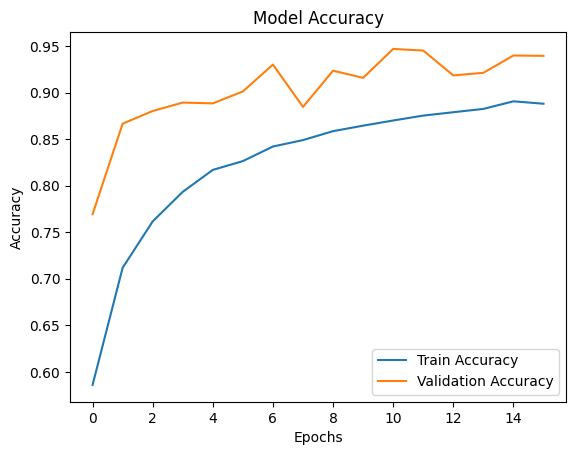

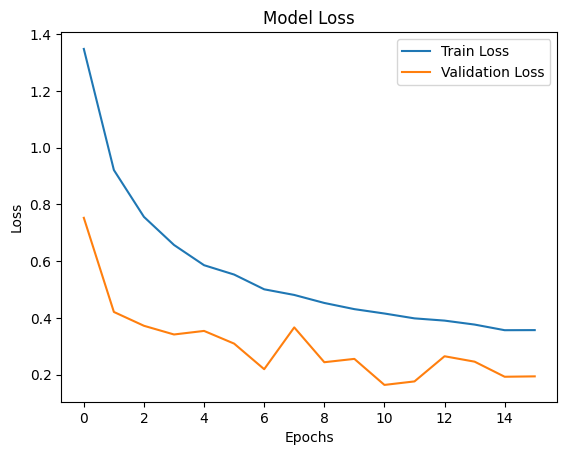

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
